# Gerar amostra imagens CIFAR-10

Files already downloaded and verified


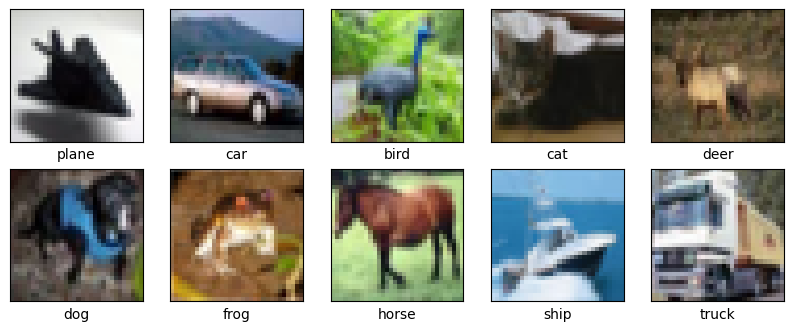

As imagens foram salvas em /CNN_ImageClassification/images\cifar10_classes.png


In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

# Define a transformação para normalizar os dados e convertê-los em tensores
mean = (0.4914, 0.4822, 0.4465)  # médias para o dataset CIFAR-10
std = (0.247, 0.243, 0.261)      # desvios padrão para o dataset CIFAR-10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])

# Carrega o dataset CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False)  # desativa o shuffle

# Função para desfazer a normalização
def unnormalize(img, mean, std):
    img = img.clone()  # Faz uma cópia do tensor para evitar mudanças na imagem original
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)  # desfaz normalização: (img * std) + mean
    return img

# Definir as classes do CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Criar um dicionário para armazenar uma imagem de cada classe
images_per_class = {}

# Iterar sobre o dataset até obter uma imagem de cada classe
for images, labels in trainloader:
    label = labels.item()
    if label not in images_per_class:
        images_per_class[label] = images
    if len(images_per_class) == len(classes):  # Se já temos uma imagem de cada classe, parar
        break

# Define o caminho completo para a pasta onde as imagens serão salvas
external_folder_path = '/CNN_ImageClassification/images'  # Altere para o caminho absoluto da pasta

# Cria a pasta se ainda não existir
if not os.path.exists(external_folder_path):
    os.makedirs(external_folder_path)

# Visualizando e salvando uma imagem de cada classe
plt.figure(figsize=[10, 10])
for i in range(len(classes)):  # Exibe uma imagem para cada classe
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Pega a imagem e remove a normalização
    img = unnormalize(images_per_class[i][0], mean, std).permute(1, 2, 0)

    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(classes[i])

# Salva a figura na pasta especificada
output_path = os.path.join(external_folder_path, "cifar10_classes.png")
plt.savefig(output_path)
plt.show()

print(f"As imagens foram salvas em {output_path}")
